In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:

youtube_data = pd.read_csv("../data/youtube data/data_1/Table data.csv") 
scripts_data = pd.read_csv("../data/niche_data/Faroun_cats_transcription.csv")

scripts_data = scripts_data.rename(columns={"video_id" : "Content"})
youtube_data_full = pd.merge(youtube_data , scripts_data[['transcript' , 'Content']] , on="Content")

In [9]:
def youtube_eda(youtube_data_full):
    print("5 rows")
    display(youtube_data_full.head(2))
    print("\n description")
    display(youtube_data_full.describe())
    print("\n shape of data")
    display(youtube_data_full.shape)
    print("data types and null ")
    display(youtube_data_full.info())

youtube_eda(youtube_data_full)



5 rows


,Content,Video title,Video publish time,Duration,Views,Average view duration,Stayed to watch (%),Subscribers gained,Likes,Dislikes,Comments added,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),transcript
0,V0zDB3NBohg,قطك يعاني في صمت دون علمك 😿💚 #قطط #القطط,"Mar 11, 2025",57.0,1558482,0:00:41,79.91,5691,48721,983,709,1156233,13526.1716,5605,249079,7.70,هل تعلم ان قطك الصغير يعاني في صمت لكنه لا يري...
1,Mj9pt4580KQ,هل القطط ترى نفسها قطط 🐱😹 #القطط #قطط,"Dec 1, 2024",60.0,1338299,0:00:46,76.53,5572,61314,1363,274,1328127,17217.7227,5469,1187722,6.07,هل تساءلت يوما هل القطط تعرف انها قطط اولا الق...



 description


,Duration,Views,Stayed to watch (%),Subscribers gained,Likes,Dislikes,Comments added,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000,7.000000e+01,70.000000
mean,50.214286,2.455882e+05,70.216000,556.585714,9068.400000,175.771429,60.257143,1.981058e+05,2236.017291,544.371429,2.019750e+05,7.488429
std,7.583148,2.965019e+05,4.373024,1130.458872,11384.324947,254.508345,102.046265,2.619064e+05,3254.261851,1112.714583,4.805566e+05,0.920609
min,31.000000,1.999900e+04,57.860000,14.000000,645.000000,19.000000,1.000000,1.119700e+04,119.915900,14.000000,1.176000e+04,5.450000
25%,44.000000,8.335250e+04,67.277500,115.000000,3122.500000,47.000000,17.250000,5.207350e+04,556.805675,112.000000,5.649825e+04,6.830000
50%,50.500000,1.239135e+05,69.780000,200.500000,5438.500000,91.500000,30.000000,9.696650e+04,1114.609500,194.000000,8.494500e+04,7.435000
75%,56.750000,2.966795e+05,72.885000,458.750000,8553.750000,171.500000,53.750000,2.064238e+05,2300.063550,444.750000,1.877108e+05,8.100000
max,68.000000,1.558482e+06,80.370000,5691.000000,61314.000000,1363.000000,709.000000,1.328127e+06,17217.722700,5605.000000,3.864089e+06,10.310000



 shape of data


(70, 17)

data types and null 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             70 non-null     object 
 1   Video title                         70 non-null     object 
 2   Video publish time                  70 non-null     object 
 3   Duration                            70 non-null     float64
 4   Views                               70 non-null     int64  
 5   Average view duration               70 non-null     object 
 6   Stayed to watch (%)                 70 non-null     float64
 7   Subscribers gained                  70 non-null     int64  
 8   Likes                               70 non-null     int64  
 9   Dislikes                            70 non-null     int64  
 10  Comments added                      70 non-null     int64  
 11  Engaged views             

None

In [10]:
def youtube_cleaning(youtube_data_full):
    youtube_data_full['Video publish time'] = pd.to_datetime(youtube_data_full['Video publish time'] , errors='coerce')
    youtube_data_full['Day_publish_time'] = youtube_data_full['Video publish time'].dt.day
    youtube_data_full['Month_publish_time'] = youtube_data_full['Video publish time'].dt.month
    youtube_data_full['Year_publish_time'] = youtube_data_full['Video publish time'].dt.year
    youtube_data_full['Average view duration'] = pd.to_timedelta(youtube_data_full['Average view duration'] , errors='coerce')
    youtube_data_full.drop(0 , inplace=True)
    return youtube_data_full
youtube_data_full  = youtube_cleaning(youtube_data_full)


In [11]:
youtube_data_full.to_csv('youtube_table_cleaned.csv' , index=False)
youtube_eda(youtube_data_full)

5 rows


,Content,Video title,Video publish time,Duration,Views,Average view duration,Stayed to watch (%),Subscribers gained,Likes,Dislikes,Comments added,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),transcript,Day_publish_time,Month_publish_time,Year_publish_time
1,Mj9pt4580KQ,هل القطط ترى نفسها قطط 🐱😹 #القطط #قطط,2024-12-01,60.0,1338299,0 days 00:00:46,76.53,5572,61314,1363,274,1328127,17217.7227,5469,1187722,6.07,هل تساءلت يوما هل القطط تعرف انها قطط اولا الق...,1,12,2024
2,xrJdJamE6zU,كيف تؤدب قطتك الشقية 💚🐱 #القطط #قطط,2025-02-24,59.0,1133887,0 days 00:00:43,76.39,3173,47557,1007,284,990668,12124.8987,3117,3864089,5.45,اذا كنت تريد تاديب قطتك الشقيه يجب عليك الانتب...,24,2,2025



 description


,Video publish time,Duration,Views,Average view duration,Stayed to watch (%),Subscribers gained,Likes,Dislikes,Comments added,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Day_publish_time,Month_publish_time,Year_publish_time
count,69,69.000000,6.900000e+01,69,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.000000,69.000000,6.900000e+01,69.000000,69.000000,69.000000,69.000000
mean,2025-04-04 09:44:20.869565184,50.115942,2.265608e+05,0 days 00:00:36.869565217,70.075507,482.173913,8493.724638,164.072464,50.855072,1.842199e+05,2072.391867,471.028986,2.012923e+05,7.485362,16.202899,3.942029,2024.971014
min,2024-12-01 00:00:00,31.000000,1.999900e+04,0 days 00:00:25,57.860000,14.000000,645.000000,19.000000,1.000000,1.119700e+04,119.915900,14.000000,1.176000e+04,5.450000,1.000000,1.000000,2024.000000
25%,2025-02-09 00:00:00,44.000000,8.327800e+04,0 days 00:00:34,67.220000,114.000000,3120.000000,47.000000,17.000000,5.158600e+04,551.762000,112.000000,5.638400e+04,6.810000,9.000000,2.000000,2025.000000
50%,2025-03-16 00:00:00,50.000000,1.225930e+05,0 days 00:00:37,69.720000,198.000000,5432.000000,90.000000,30.000000,9.661400e+04,1101.870500,192.000000,8.238400e+04,7.380000,18.000000,3.000000,2025.000000
75%,2025-06-21 00:00:00,56.000000,2.478320e+05,0 days 00:00:40,72.720000,398.000000,8445.000000,164.000000,53.000000,1.885160e+05,2094.712200,387.000000,1.685490e+05,8.100000,23.000000,6.000000,2025.000000
max,2025-07-22 00:00:00,68.000000,1.338299e+06,0 days 00:00:47,80.370000,5572.000000,61314.000000,1363.000000,361.000000,1.328127e+06,17217.722700,5469.000000,3.864089e+06,10.310000,29.000000,12.000000,2025.000000
std,NaN,7.593605,2.519731e+05,0 days 00:00:04.758623884,4.242944,950.490585,10394.767421,236.654956,65.480189,2.364486e+05,2973.931476,935.022082,4.840430e+05,0.926993,8.182801,2.600249,0.168995



 shape of data


(69, 20)

data types and null 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Content                             69 non-null     object         
 1   Video title                         69 non-null     object         
 2   Video publish time                  69 non-null     datetime64[ns] 
 3   Duration                            69 non-null     float64        
 4   Views                               69 non-null     int64          
 5   Average view duration               69 non-null     timedelta64[ns]
 6   Stayed to watch (%)                 69 non-null     float64        
 7   Subscribers gained                  69 non-null     int64          
 8   Likes                               69 non-null     int64          
 9   Dislikes                            69 non-null     int64          


None

C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128569 (\N{CAT FACE WITH TEARS OF JOY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128049 (\N{CAT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128575 (\N{CRYING CAT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128568 (\N{GRINNING CAT FACE WITH SMILI

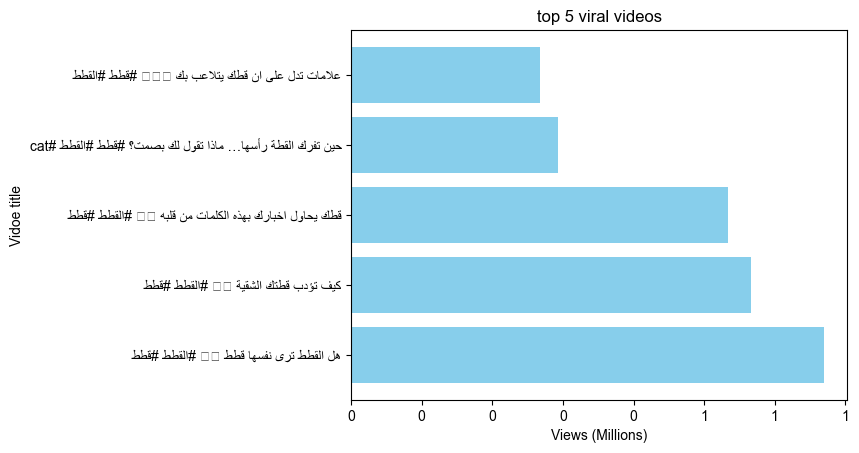

In [12]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.ticker as mtick

top_5_performing_videos = youtube_data_full.nlargest(5 , 'Views')
plt.rcParams['font.family'] = 'Arial'
top_5_Views = top_5_performing_videos["Views"] / 1000000 
video_titles_rtl = [get_display(arabic_reshaper.reshape(title)) for title in top_5_performing_videos['Video title']]
plt.barh(video_titles_rtl , top_5_Views , color= "skyblue")
plt.title("top 5 viral videos")
plt.ylabel("Vidoe title")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))
plt.xlabel("Views (Millions)")
plt.show()

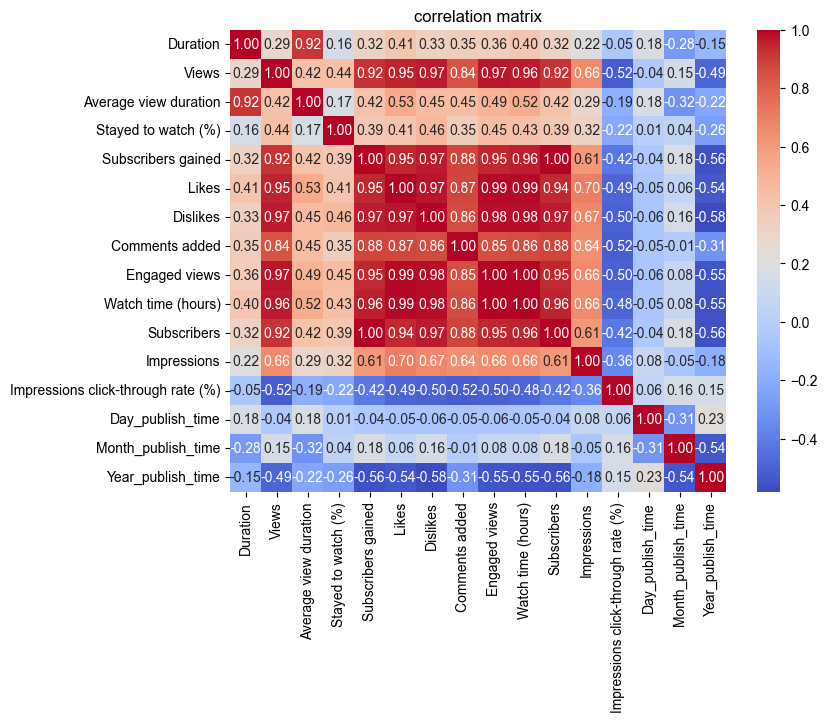

In [13]:
numric_youtube_data =youtube_data_full.select_dtypes(include="number")
corr = numric_youtube_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation matrix")
plt.show()

In [14]:
youtube_data_full['Viralty_check'] = youtube_data_full['Views'].apply(lambda x: 'Viral' if x>500000 else 'Not Viral')

In [15]:
Not_Viral = youtube_data_full[youtube_data_full['Viralty_check'] == 'Not Viral']
youtube_eda(Not_Viral)

5 rows


,Content,Video title,Video publish time,Duration,Views,Average view duration,Stayed to watch (%),Subscribers gained,Likes,Dislikes,...,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),transcript,Day_publish_time,Month_publish_time,Year_publish_time,Viralty_check
9,EfNCkWrkh8I,3 حيل بسيطة لجعل قطك يحبك 🐱💚#القطط #قطط,2025-02-18,68.0,488866,0 days 00:00:47,64.13,902,19347,341,...,441577,5849.9002,876,46485,6.55,ثلاثه حيل بسيطه تجعل قطك يحبك بجنون واحد حدد م...,18,2,2025,Not Viral
10,3ziOZrV8nzM,كيف تقترب من أي قط بسهولة باستخدام إصبع واحد ف...,2025-02-04,53.0,462976,0 days 00:00:39,68.28,589,19064,281,...,459179,5060.4292,563,244604,7.01,هل تعلم ان بامكانك كسر الحاجز والتقرب من اي قط...,4,2,2025,Not Viral



 description


,Video publish time,Duration,Views,Average view duration,Stayed to watch (%),Subscribers gained,Likes,Dislikes,Comments added,Engaged views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Day_publish_time,Month_publish_time,Year_publish_time
count,61,61.000000,61.000000,61,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,2025-04-08 16:55:04.918032896,49.508197,154804.245902,0 days 00:00:36.344262295,69.516393,235.377049,5856.000000,98.770492,36.131148,121526.901639,1299.000274,228.295082,119823.491803,7.584590,16.163934,3.737705,2025.0
min,2025-01-03 00:00:00,31.000000,19999.000000,0 days 00:00:25,57.860000,14.000000,645.000000,19.000000,1.000000,11197.000000,119.915900,14.000000,11760.000000,5.700000,1.000000,1.000000,2025.0
25%,2025-02-11 00:00:00,43.000000,71568.000000,0 days 00:00:33,66.640000,109.000000,2910.000000,46.000000,17.000000,49748.000000,476.906800,104.000000,55705.000000,6.960000,9.000000,2.000000,2025.0
50%,2025-03-16 00:00:00,49.000000,115108.000000,0 days 00:00:37,69.180000,168.000000,4686.000000,76.000000,27.000000,94505.000000,920.603700,163.000000,78586.000000,7.500000,18.000000,3.000000,2025.0
75%,2025-06-26 00:00:00,55.000000,210921.000000,0 days 00:00:39,72.060000,291.000000,7339.000000,121.000000,43.000000,154749.000000,1720.919100,283.000000,153948.000000,8.130000,23.000000,6.000000,2025.0
max,2025-07-22 00:00:00,68.000000,488866.000000,0 days 00:00:47,80.370000,902.000000,19347.000000,341.000000,198.000000,459179.000000,5849.900200,876.000000,660206.000000,10.310000,29.000000,7.000000,2025.0
std,NaN,7.647708,113432.124944,0 days 00:00:04.632800614,4.063911,183.812510,4090.715577,76.954184,31.366902,101833.793552,1194.242936,179.038482,115265.506995,0.891612,8.284886,2.242778,0.0



 shape of data


(61, 21)

data types and null 
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 9 to 69
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Content                             61 non-null     object         
 1   Video title                         61 non-null     object         
 2   Video publish time                  61 non-null     datetime64[ns] 
 3   Duration                            61 non-null     float64        
 4   Views                               61 non-null     int64          
 5   Average view duration               61 non-null     timedelta64[ns]
 6   Stayed to watch (%)                 61 non-null     float64        
 7   Subscribers gained                  61 non-null     int64          
 8   Likes                               61 non-null     int64          
 9   Dislikes                            61 non-null     int64          
 10  

None

In [17]:
from sklearn.model_selection import train_test_split

youtube_numeric_data  = youtube_data_full
def youtube_numeric_cleaning(youtube_numeric_data):
    youtube_numeric_data = youtube_numeric_data.drop('Content' , axis=1)
    youtube_numeric_data = youtube_numeric_data.drop('Video title' , axis=1)
    youtube_numeric_data = youtube_numeric_data.drop('transcript' , axis=1)
    youtube_numeric_data = youtube_numeric_data.drop('Video publish time' , axis=1)
    youtube_numeric_data['Average view duration'] = pd.to_numeric(youtube_numeric_data['Average view duration'] , errors='coerce')
    youtube_numeric_data = youtube_numeric_data.drop(['Views' ,'Subscribers gained' ,'Likes' , 'Dislikes' , 'Engaged views' , 'Watch time (hours)' , 'Subscribers' , 
                                                     'Impressions' , 'Impressions click-through rate (%)' , 'Comments added'], axis=1)
    return youtube_numeric_data
youtube_numeric_data = youtube_numeric_cleaning(youtube_numeric_data)
youtube_eda(youtube_numeric_data)
x=youtube_numeric_data.drop('Viralty_check' , axis=1)
y = youtube_numeric_data['Viralty_check']  

x_train , x_test , y_train , y_test = train_test_split(
    x , y , test_size=0.2 , random_state=42 
)

5 rows


,Duration,Average view duration,Stayed to watch (%),Day_publish_time,Month_publish_time,Year_publish_time,Viralty_check
1,60.0,46000000000,76.53,1,12,2024,Viral
2,59.0,43000000000,76.39,24,2,2025,Viral



 description


,Duration,Average view duration,Stayed to watch (%),Day_publish_time,Month_publish_time,Year_publish_time
count,69.000000,6.900000e+01,69.000000,69.000000,69.000000,69.000000
mean,50.115942,3.686957e+10,70.075507,16.202899,3.942029,2024.971014
std,7.593605,4.758624e+09,4.242944,8.182801,2.600249,0.168995
min,31.000000,2.500000e+10,57.860000,1.000000,1.000000,2024.000000
25%,44.000000,3.400000e+10,67.220000,9.000000,2.000000,2025.000000
50%,50.000000,3.700000e+10,69.720000,18.000000,3.000000,2025.000000
75%,56.000000,4.000000e+10,72.720000,23.000000,6.000000,2025.000000
max,68.000000,4.700000e+10,80.370000,29.000000,12.000000,2025.000000



 shape of data


(69, 7)

data types and null 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Duration               69 non-null     float64
 1   Average view duration  69 non-null     int64  
 2   Stayed to watch (%)    69 non-null     float64
 3   Day_publish_time       69 non-null     int32  
 4   Month_publish_time     69 non-null     int32  
 5   Year_publish_time      69 non-null     int32  
 6   Viralty_check          69 non-null     object 
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 3.1+ KB


None

In [18]:
youtube_eda(youtube_numeric_data)


5 rows


,Duration,Average view duration,Stayed to watch (%),Day_publish_time,Month_publish_time,Year_publish_time,Viralty_check
1,60.0,46000000000,76.53,1,12,2024,Viral
2,59.0,43000000000,76.39,24,2,2025,Viral



 description


,Duration,Average view duration,Stayed to watch (%),Day_publish_time,Month_publish_time,Year_publish_time
count,69.000000,6.900000e+01,69.000000,69.000000,69.000000,69.000000
mean,50.115942,3.686957e+10,70.075507,16.202899,3.942029,2024.971014
std,7.593605,4.758624e+09,4.242944,8.182801,2.600249,0.168995
min,31.000000,2.500000e+10,57.860000,1.000000,1.000000,2024.000000
25%,44.000000,3.400000e+10,67.220000,9.000000,2.000000,2025.000000
50%,50.000000,3.700000e+10,69.720000,18.000000,3.000000,2025.000000
75%,56.000000,4.000000e+10,72.720000,23.000000,6.000000,2025.000000
max,68.000000,4.700000e+10,80.370000,29.000000,12.000000,2025.000000



 shape of data


(69, 7)

data types and null 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Duration               69 non-null     float64
 1   Average view duration  69 non-null     int64  
 2   Stayed to watch (%)    69 non-null     float64
 3   Day_publish_time       69 non-null     int32  
 4   Month_publish_time     69 non-null     int32  
 5   Year_publish_time      69 non-null     int32  
 6   Viralty_check          69 non-null     object 
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 3.1+ KB


None

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100 , random_state=42)

clf.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf.predict(x_test)

Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

   Not Viral       0.79      1.00      0.88        11
       Viral       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14


Confusion Matrix:
 [[11  0]
 [ 3  0]]


c:\Users\anasl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anasl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anasl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

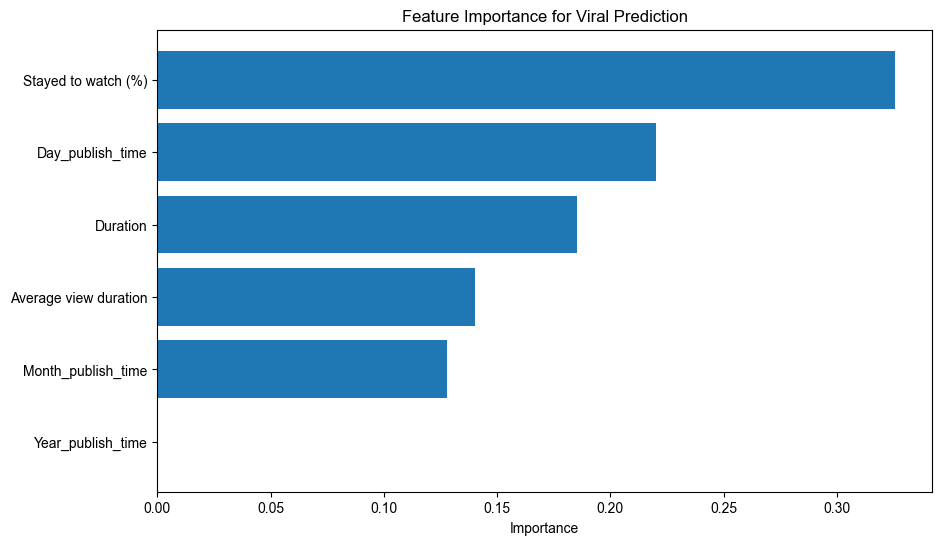

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = pd.DataFrame({'Feature':x_train.columns , 'Importance' : clf.feature_importances_})
importances = importances.sort_values(by= 'Importance' , ascending= False)

plt.figure(figsize=(10,6))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance for Viral Prediction")
plt.show()


### Conclusion
- Although the model achieved an accuracy of 78%, the **F1-score for the viral class was 0%**, meaning it failed to predict any viral videos correctly.  
- The main reason: the model was trained on **leaky data** (post-publication metrics like views and likes), which it exploited, resulting in artificially high accuracy but poor predictive power for true virality.

### Decision / Next Steps
- Remove any leaky features (views, likes, etc.) and focus on **pre-publication metrics** (title, caption, duration, transcript).  
- This approach allows us to incorporate **competitor data** collected via scraping.  
- These steps will be implemented in the notebook: [Youtube_Niche_Data.ipynb].


---


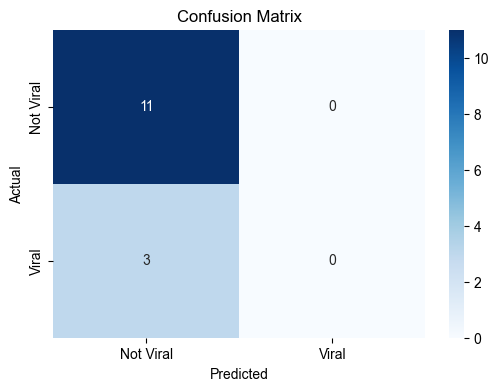

In [22]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm , annot=True , fmt="d" , cmap="Blues" , 
            xticklabels=["Not Viral" , "Viral"],
            yticklabels=["Not Viral" , "Viral"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
test_data = pd.read_csv("../data/Table data.csv")
test_data['Viralty_check'] = test_data['Views'].apply(lambda x: 'Viral' if x>500000 else 'Not Viral')
def youtube_test_numeric_cleaning(youtube_numeric_data):
    youtube_numeric_data.drop('Content' , axis=1)
    youtube_numeric_data['Video publish time'] = pd.to_datetime(youtube_numeric_data['Video publish time'] , errors='coerce')
    youtube_numeric_data['Day_publish_time'] = youtube_numeric_data['Video publish time'].dt.day
    youtube_numeric_data['Month_publish_time'] = youtube_numeric_data['Video publish time'].dt.month
    youtube_numeric_data['Year_publish_time'] = youtube_numeric_data['Video publish time'].dt.year
    youtube_numeric_data = youtube_numeric_data.drop('Video title' , axis=1)
    youtube_numeric_data = youtube_numeric_data.drop('Video publish time' , axis=1)
    youtube_numeric_data = youtube_numeric_data.drop('Estimated revenue (USD)', axis=1 )
    youtube_numeric_data['Average view duration'] = pd.to_timedelta(youtube_numeric_data['Average view duration'] , errors='coerce')
    youtube_numeric_data['Average view duration'] = pd.to_numeric(youtube_numeric_data['Average view duration'] , errors='coerce')
    youtube_numeric_data = youtube_numeric_data.iloc[1:].reset_index(drop=True)
    youtube_numeric_data = youtube_numeric_data.drop(['Views' ,'Subscribers gained' ,'Likes' , 'Dislikes' , 'Engaged views' , 'Watch time (hours)' , 'Subscribers' , 
                                                     'Impressions' , 'Impressions click-through rate (%)'], axis=1)
    return youtube_numeric_data
test_data = youtube_test_numeric_cleaning(test_data)

In [24]:
test_data = test_data[youtube_numeric_data.columns]

test_data = test_data.drop('Viralty_check' , axis=1)

In [25]:
display(youtube_numeric_data.columns)
display(test_data.columns)

Index(['Duration', 'Average view duration', 'Stayed to watch (%)',
       'Day_publish_time', 'Month_publish_time', 'Year_publish_time',
       'Viralty_check'],
      dtype='object')

Index(['Duration', 'Average view duration', 'Stayed to watch (%)',
       'Day_publish_time', 'Month_publish_time', 'Year_publish_time'],
      dtype='object')

In [26]:
y_pred_new = clf.predict(test_data)
print("Predicted labels:", y_pred_new)


Predicted labels: ['Viral' 'Not Viral']


In [27]:
y_proba_new = clf.predict_proba(test_data)
print("Prediction probabilities:\n", y_proba_new)


Prediction probabilities:
 [[0.48 0.52]
 [0.62 0.38]]
